# <center>Visualisation</center>

* 函数图, 折线图 (line chart)
* 柱状图 (bar chart, histogram)
* 饼状图 (pie chart)
* 地图 (geo plot)

__可视化的目的：表达数据的意义__

* 简单
* 清晰

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. Math Equation Plotting

### Linear

$y = 2x + 1$

In [13]:
plt.rcParams['figure.figsize'] = (5, 3)

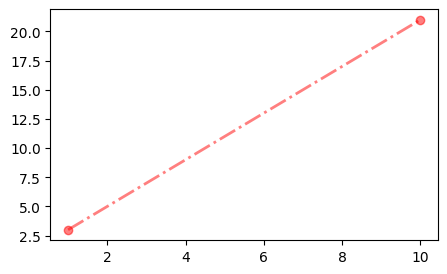

In [18]:
plt.plot(
    [1, 10],
    [3, 21],
    linestyle='-.',
    linewidth=2.0,
    color='red',
    alpha=0.5,   # alpha: transparency
    marker='o',
)
plt.show()

[More API styling options for **plt.plot**](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html)

In [19]:
x = np.linspace(1, 10, 2)
y = 2 * x + 1

In [20]:
x

array([ 1., 10.])

In [21]:
y

array([ 3., 21.])

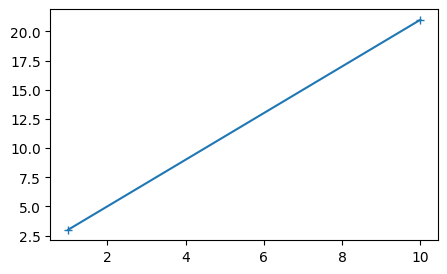

In [22]:
plt.plot(x, y, marker='+')
plt.show()

### Logistic

$$y = \frac {1} {1 + e^{-z}}$$

In [23]:
z = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-z))

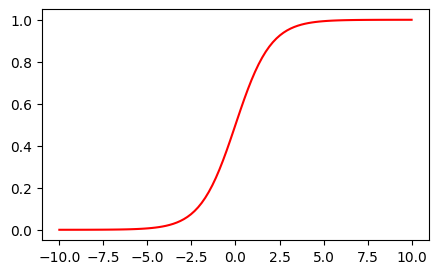

In [24]:
plt.plot(z, y, linestyle='-', color='red')
plt.show()

$$y = \frac {1} {1 + e^{-iz}}$$

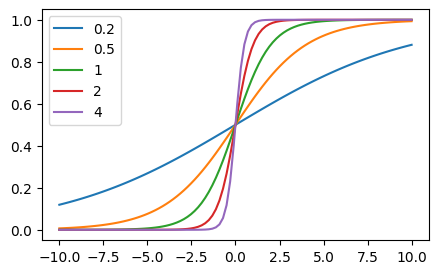

In [25]:
for i in [0.2, 0.5, 1, 2, 4]:
    y = 1 / (1 + np.exp(- i * z))
    plt.plot(z, y, label=i)

plt.legend()
plt.show()

### Entropy

$$y = - p\log_2p - (1-p)\log_2(1-p)$$

In [26]:
p = np.linspace(0.01, 1, 100, endpoint = False)
p

array([0.01  , 0.0199, 0.0298, 0.0397, 0.0496, 0.0595, 0.0694, 0.0793,
       0.0892, 0.0991, 0.109 , 0.1189, 0.1288, 0.1387, 0.1486, 0.1585,
       0.1684, 0.1783, 0.1882, 0.1981, 0.208 , 0.2179, 0.2278, 0.2377,
       0.2476, 0.2575, 0.2674, 0.2773, 0.2872, 0.2971, 0.307 , 0.3169,
       0.3268, 0.3367, 0.3466, 0.3565, 0.3664, 0.3763, 0.3862, 0.3961,
       0.406 , 0.4159, 0.4258, 0.4357, 0.4456, 0.4555, 0.4654, 0.4753,
       0.4852, 0.4951, 0.505 , 0.5149, 0.5248, 0.5347, 0.5446, 0.5545,
       0.5644, 0.5743, 0.5842, 0.5941, 0.604 , 0.6139, 0.6238, 0.6337,
       0.6436, 0.6535, 0.6634, 0.6733, 0.6832, 0.6931, 0.703 , 0.7129,
       0.7228, 0.7327, 0.7426, 0.7525, 0.7624, 0.7723, 0.7822, 0.7921,
       0.802 , 0.8119, 0.8218, 0.8317, 0.8416, 0.8515, 0.8614, 0.8713,
       0.8812, 0.8911, 0.901 , 0.9109, 0.9208, 0.9307, 0.9406, 0.9505,
       0.9604, 0.9703, 0.9802, 0.9901])

In [27]:
y = - p * np.log2(p) - (1 - p) * np.log2(1 - p)

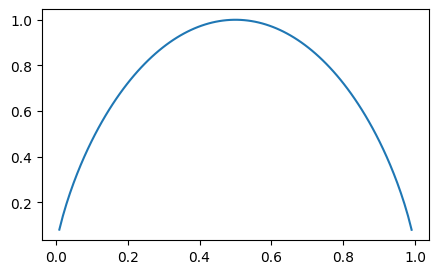

In [28]:
plt.plot(p, y, linestyle = '-')
plt.show()

<hr/>

## 2. Covid-19 Example

In [29]:
import findspark
import os

findspark.init(os.environ['SPARK_HOME'])

In [30]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [31]:
spark = SparkSession.builder.appName('visualisation').getOrCreate()

In [32]:
df = spark.read.csv('../data/WHO-COVID-19-global-data.csv', header=True, sep = ',', inferSchema=True)

In [33]:
print(df.count())
df.printSchema()

19134
root
 |-- Date_reported: timestamp (nullable = true)
 |-- Country_code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- WHO_region: string (nullable = true)
 |-- New_cases: integer (nullable = true)
 |-- Cumulative_cases: integer (nullable = true)
 |-- New_deaths: integer (nullable = true)
 |-- Cumulative_deaths: integer (nullable = true)



In [34]:
df.show(5)

+-------------------+------------+-----------+----------+---------+----------------+----------+-----------------+
|      Date_reported|Country_code|    Country|WHO_region|New_cases|Cumulative_cases|New_deaths|Cumulative_deaths|
+-------------------+------------+-----------+----------+---------+----------------+----------+-----------------+
|2020-02-24 11:00:00|          AF|Afghanistan|      EMRO|        1|               1|         0|                0|
|2020-02-25 11:00:00|          AF|Afghanistan|      EMRO|        0|               1|         0|                0|
|2020-02-26 11:00:00|          AF|Afghanistan|      EMRO|        0|               1|         0|                0|
|2020-02-27 11:00:00|          AF|Afghanistan|      EMRO|        0|               1|         0|                0|
|2020-02-28 11:00:00|          AF|Afghanistan|      EMRO|        0|               1|         0|                0|
+-------------------+------------+-----------+----------+---------+----------------+----

In [35]:
df = df.withColumn('Date_reported', F.to_date('Date_reported')).cache()

In [36]:
df.printSchema()

root
 |-- Date_reported: date (nullable = true)
 |-- Country_code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- WHO_region: string (nullable = true)
 |-- New_cases: integer (nullable = true)
 |-- Cumulative_cases: integer (nullable = true)
 |-- New_deaths: integer (nullable = true)
 |-- Cumulative_deaths: integer (nullable = true)



In [37]:
df.show(5)

+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
|Date_reported|Country_code|    Country|WHO_region|New_cases|Cumulative_cases|New_deaths|Cumulative_deaths|
+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
|   2020-02-24|          AF|Afghanistan|      EMRO|        1|               1|         0|                0|
|   2020-02-25|          AF|Afghanistan|      EMRO|        0|               1|         0|                0|
|   2020-02-26|          AF|Afghanistan|      EMRO|        0|               1|         0|                0|
|   2020-02-27|          AF|Afghanistan|      EMRO|        0|               1|         0|                0|
|   2020-02-28|          AF|Afghanistan|      EMRO|        0|               1|         0|                0|
+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
only showing top 5 rows



In [41]:
rows = df.filter(F.col('Country') == 'China').sort('Date_reported') \
         .select(['Date_reported', 'Cumulative_cases', 'Cumulative_deaths']).collect()
rows

[Row(Date_reported=datetime.date(2020, 1, 11), Cumulative_cases=41, Cumulative_deaths=1),
 Row(Date_reported=datetime.date(2020, 1, 12), Cumulative_cases=41, Cumulative_deaths=1),
 Row(Date_reported=datetime.date(2020, 1, 13), Cumulative_cases=41, Cumulative_deaths=1),
 Row(Date_reported=datetime.date(2020, 1, 14), Cumulative_cases=41, Cumulative_deaths=1),
 Row(Date_reported=datetime.date(2020, 1, 15), Cumulative_cases=41, Cumulative_deaths=1),
 Row(Date_reported=datetime.date(2020, 1, 16), Cumulative_cases=41, Cumulative_deaths=1),
 Row(Date_reported=datetime.date(2020, 1, 17), Cumulative_cases=45, Cumulative_deaths=2),
 Row(Date_reported=datetime.date(2020, 1, 18), Cumulative_cases=62, Cumulative_deaths=2),
 Row(Date_reported=datetime.date(2020, 1, 19), Cumulative_cases=121, Cumulative_deaths=3),
 Row(Date_reported=datetime.date(2020, 1, 20), Cumulative_cases=198, Cumulative_deaths=4),
 Row(Date_reported=datetime.date(2020, 1, 21), Cumulative_cases=291, Cumulative_deaths=6),
 Row(Da

## Line Chart

* [line API](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html)

In [42]:
x = [r.Date_reported for r in rows]
y1 = [r.Cumulative_cases for r in rows]
y2 = [r.Cumulative_deaths for r in rows]

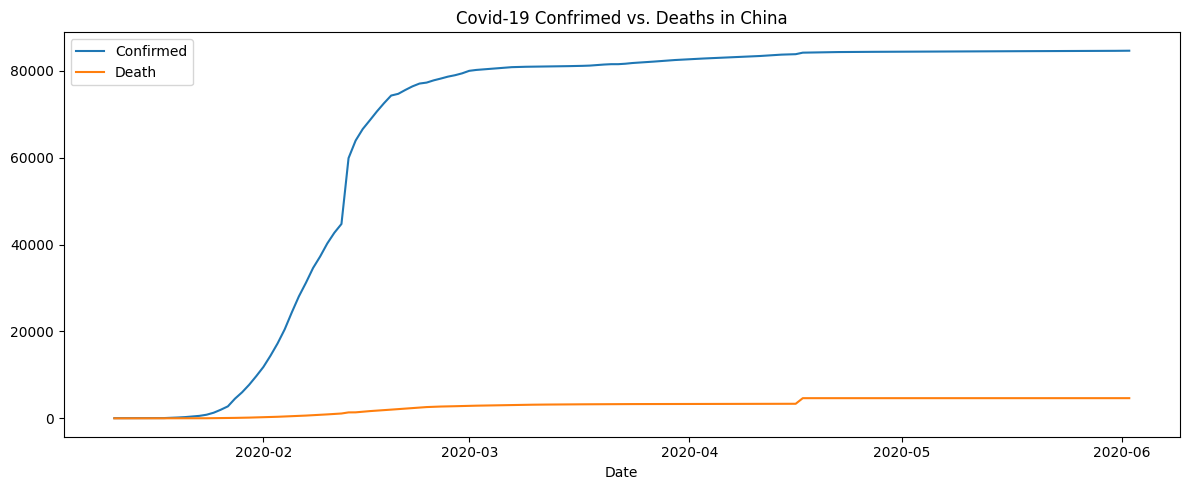

In [47]:
plt.figure(figsize=(12, 5))

plt.plot(x, y1, label='Confirmed')
plt.plot(x, y2, label='Death')

plt.legend()
plt.title('Covid-19 Confrimed vs. Deaths in China')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

#### Trick in visualisation:
when the scale of y1 and y2 differs a lot, convert them to **log<sub>10</sub>** y1 and **log<sub>10</sub>** y2

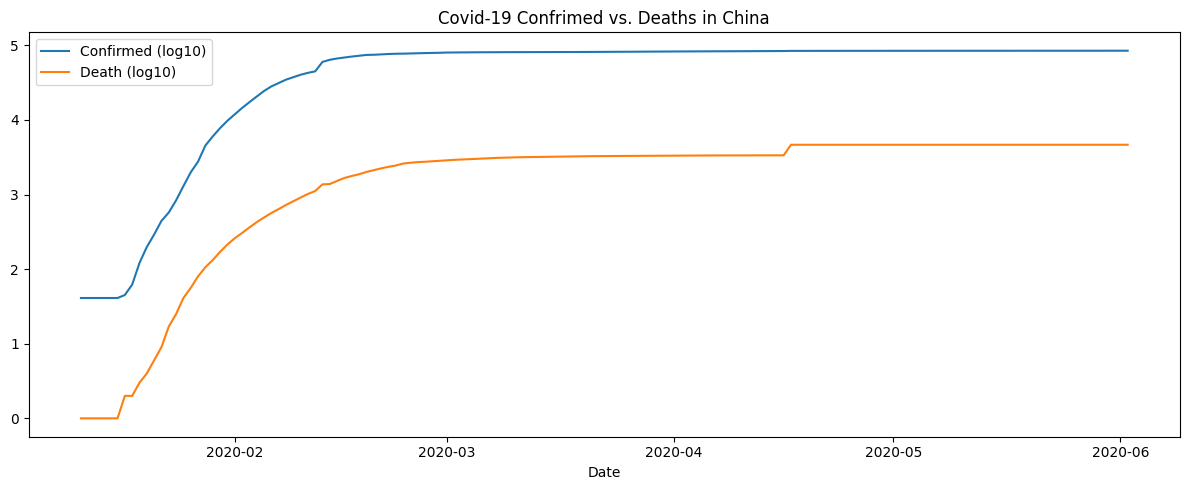

In [49]:
plt.figure(figsize=(12, 5))

plt.plot(x, [np.log10(y) for y in y1], label='Confirmed (log10)')
plt.plot(x, [np.log10(y) for y in y2], label='Death (log10)')

plt.legend()
plt.title('Covid-19 Confrimed vs. Deaths in China')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

### Code Challenge

* 选5个国家
* 比较累计确诊人数
* 以第一天发现确诊病例为起始点
* 比较一个月内发展趋势的曲线
* 把指标换成确诊人数占总人口的比例 per 1M population

See **Visualisation Code Challenge.ipynb**

## Bar Chart

* [bar API](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

In [51]:
# 最新数据对应的日期
latest_date = df.groupBy().agg(F.max(F.col('Date_reported'))).collect()[0][0]
latest_date

datetime.date(2020, 6, 2)

In [53]:
bar_data = df.filter(F.col('Date_reported') == latest_date) \
             .sort(F.desc('Cumulative_deaths')) \
             .select(['Country_code', 'Cumulative_deaths']) \
             .collect()[:5]
bar_data

[Row(Country_code='US', Cumulative_deaths=103554),
 Row(Country_code='GB', Cumulative_deaths=38489),
 Row(Country_code='IT', Cumulative_deaths=33415),
 Row(Country_code='BR', Cumulative_deaths=29314),
 Row(Country_code='ES', Cumulative_deaths=29045)]

In [55]:
codes = [r.Country_code for r in bar_data]
deaths = [r.Cumulative_deaths for r in bar_data]

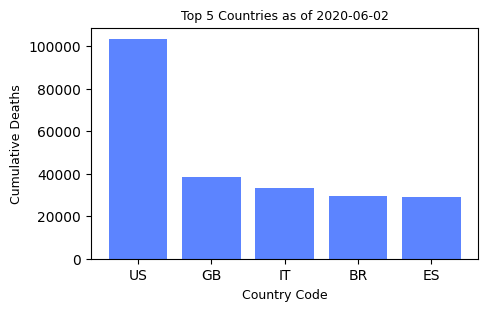

In [65]:
plt.bar(codes, deaths, alpha=0.8, color='#3366ff')

plt.title(f'Top 5 Countries as of {latest_date}', fontsize=9)
plt.xlabel('Country Code', fontsize=9)
plt.ylabel('Cumulative Deaths', fontsize=9)
plt.show()

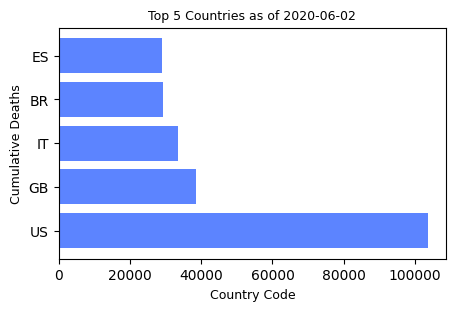

In [70]:
# horizontal bar
plt.barh(codes, deaths, alpha=0.8, color='#3366ff', align='center')

plt.title(f'Top 5 Countries as of {latest_date}', fontsize=9)
plt.xlabel('Country Code', fontsize=9)
plt.ylabel('Cumulative Deaths', fontsize=9)
plt.show()

## Pie Chart

* [pie API](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) 

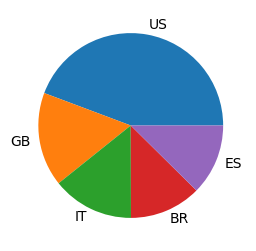

In [71]:
plt.pie(x=deaths, labels=codes)
plt.show()

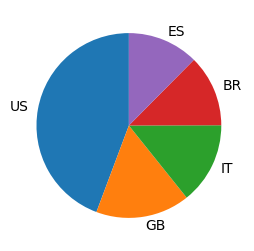

In [72]:
plt.pie(x=deaths, labels=codes, startangle=90)
plt.show()

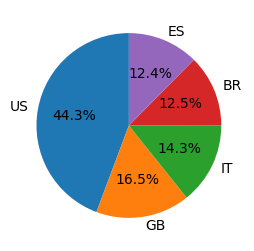

In [81]:
plt.pie(x=deaths, labels=codes, startangle=90, autopct='%1.1f%%')
# plt.pie(x=deaths, labels=codes, startangle=90, autopct='%1.0f%%')
# plt.pie(x=deaths, labels=codes, startangle=90, autopct='%1.3f%%')

plt.show()

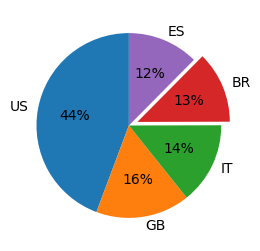

In [84]:
explode = [0.1 if c == 'BR' else 0.0 for c in codes]

plt.pie(
    x=deaths, 
    labels=codes, 
    startangle=90, 
    autopct='%1.0f%%',
    explode=explode,
)
plt.show()

## Geo Map

* [WHO Covid19 Dashboard](https://covid19.who.int/)
* [choropleth API](https://plotly.com/python/reference/#choropleth)

In [85]:
cc = spark.read.csv('../data/countryMap.txt', header=True, sep='\t', inferSchema=True)

In [86]:
cc.show(5)

+--------------+----+----+
|    Countrylet|2let|3let|
+--------------+----+----+
|   Afghanistan|  AF| AFG|
| Aland Islands|  AX| ALA|
|       Albania|  AL| ALB|
|       Algeria|  DZ| DZA|
|American Samoa|  AS| ASM|
+--------------+----+----+
only showing top 5 rows



In [88]:
df.show(5)

+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
|Date_reported|Country_code|    Country|WHO_region|New_cases|Cumulative_cases|New_deaths|Cumulative_deaths|
+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
|   2020-02-24|          AF|Afghanistan|      EMRO|        1|               1|         0|                0|
|   2020-02-25|          AF|Afghanistan|      EMRO|        0|               1|         0|                0|
|   2020-02-26|          AF|Afghanistan|      EMRO|        0|               1|         0|                0|
|   2020-02-27|          AF|Afghanistan|      EMRO|        0|               1|         0|                0|
|   2020-02-28|          AF|Afghanistan|      EMRO|        0|               1|         0|                0|
+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
only showing top 5 rows



In [90]:
res = df.join(cc, df.Country == cc.Countrylet, 'left')
res.select(['Country_code', '3let']).dropDuplicates().show(5)

+------------+----+
|Country_code|3let|
+------------+----+
|          ZA| ZAF|
|          JM| JAM|
|          OM| OMN|
|          AE| ARE|
|          LB| LBN|
+------------+----+
only showing top 5 rows



In [94]:
latest = res.filter(F.col('Date_reported') == latest_date) \
            .select(['Country', '3let', 'Cumulative_cases', 'Cumulative_deaths']) \
            .toPandas()

In [95]:
latest.head()

,Country,3let,Cumulative_cases,Cumulative_deaths
0,Afghanistan,AFG,16492,270
1,Albania,ALB,1143,33
2,Algeria,DZA,9513,661
3,Andorra,AND,764,51
4,Angola,AGO,86,4


#### Take the following code as template

In [98]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

In [99]:
init_notebook_mode(connected=True)

In [104]:
data = dict(
        type='choropleth',
        locationmode='country names',
        locations=latest['Country'],
        z=latest['Cumulative_deaths'],
        #reversescale=True,    # reverse color scale
        colorscale='YlOrRd',
        text=latest['3let'],     # text in tooltip
        colorbar={'title': 'Number of Deaths'},
      ) 

In [105]:
layout = dict(
    title=f'Covid-19 Global Confirmed Cases on {latest_date}',
    geo={'showframe': False},
)

In [106]:
choromap = go.Figure(data=[data], layout=layout)

In [107]:
# iplot: interactive plot
iplot(choromap)

In [108]:
# show the map in HTML
plot(choromap)

'temp-plot.html'